In [43]:
# IMPORT 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
# data set load
df= pd.read_csv(r"F:\Drive\ExcelR\Assignments\MLR\MLR\ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


# Taskes:

## 1) Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [12]:
# Statistical summary for all columns
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


### EDA

In [8]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [9]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [10]:
df.shape

(1436, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [40]:
# Convert categorical variable 'FuelType' to dummy variables
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

In [42]:
# standardize 
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Price', axis=1))
print(scaled_features)

[[-1.77196633 -0.57469494 -0.76804185 ...  1.75856113  2.87480715
  -2.71087388]
 [-1.77196633  0.11745379 -0.76804185 ...  1.75856113  2.87480715
  -2.71087388]
 [-1.71818412 -0.71538641 -0.76804185 ...  1.75856113  2.87480715
  -2.71087388]
 ...
 [ 0.80957948 -1.37403589 -1.03513832 ... -1.09191497 -0.34784942
   0.36888474]
 [ 0.75579727 -1.37670303 -1.03513832 ... -1.09191497 -0.34784942
   0.36888474]
 [ 1.0784905  -1.82784925  0.5674405  ...  0.78939926 -0.34784942
   0.36888474]]


In [48]:
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel
0,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,2.874807,-2.710874
1,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,2.874807,-2.710874
2,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,2.874807,-2.710874
3,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,2.874807,-2.710874
4,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577,2.874807,-2.710874
...,...,...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883,-0.347849,0.368885
1432,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.347849,0.368885
1433,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.347849,0.368885
1434,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.347849,0.368885


In [51]:
df_scaled['Price'] = df['Price']
df_scaled.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel
0,13500,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,2.874807,-2.710874
1,13750,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,2.874807,-2.710874
2,13950,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,2.874807,-2.710874
3,14950,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,2.874807,-2.710874
4,13750,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577,2.874807,-2.710874


### Visualization

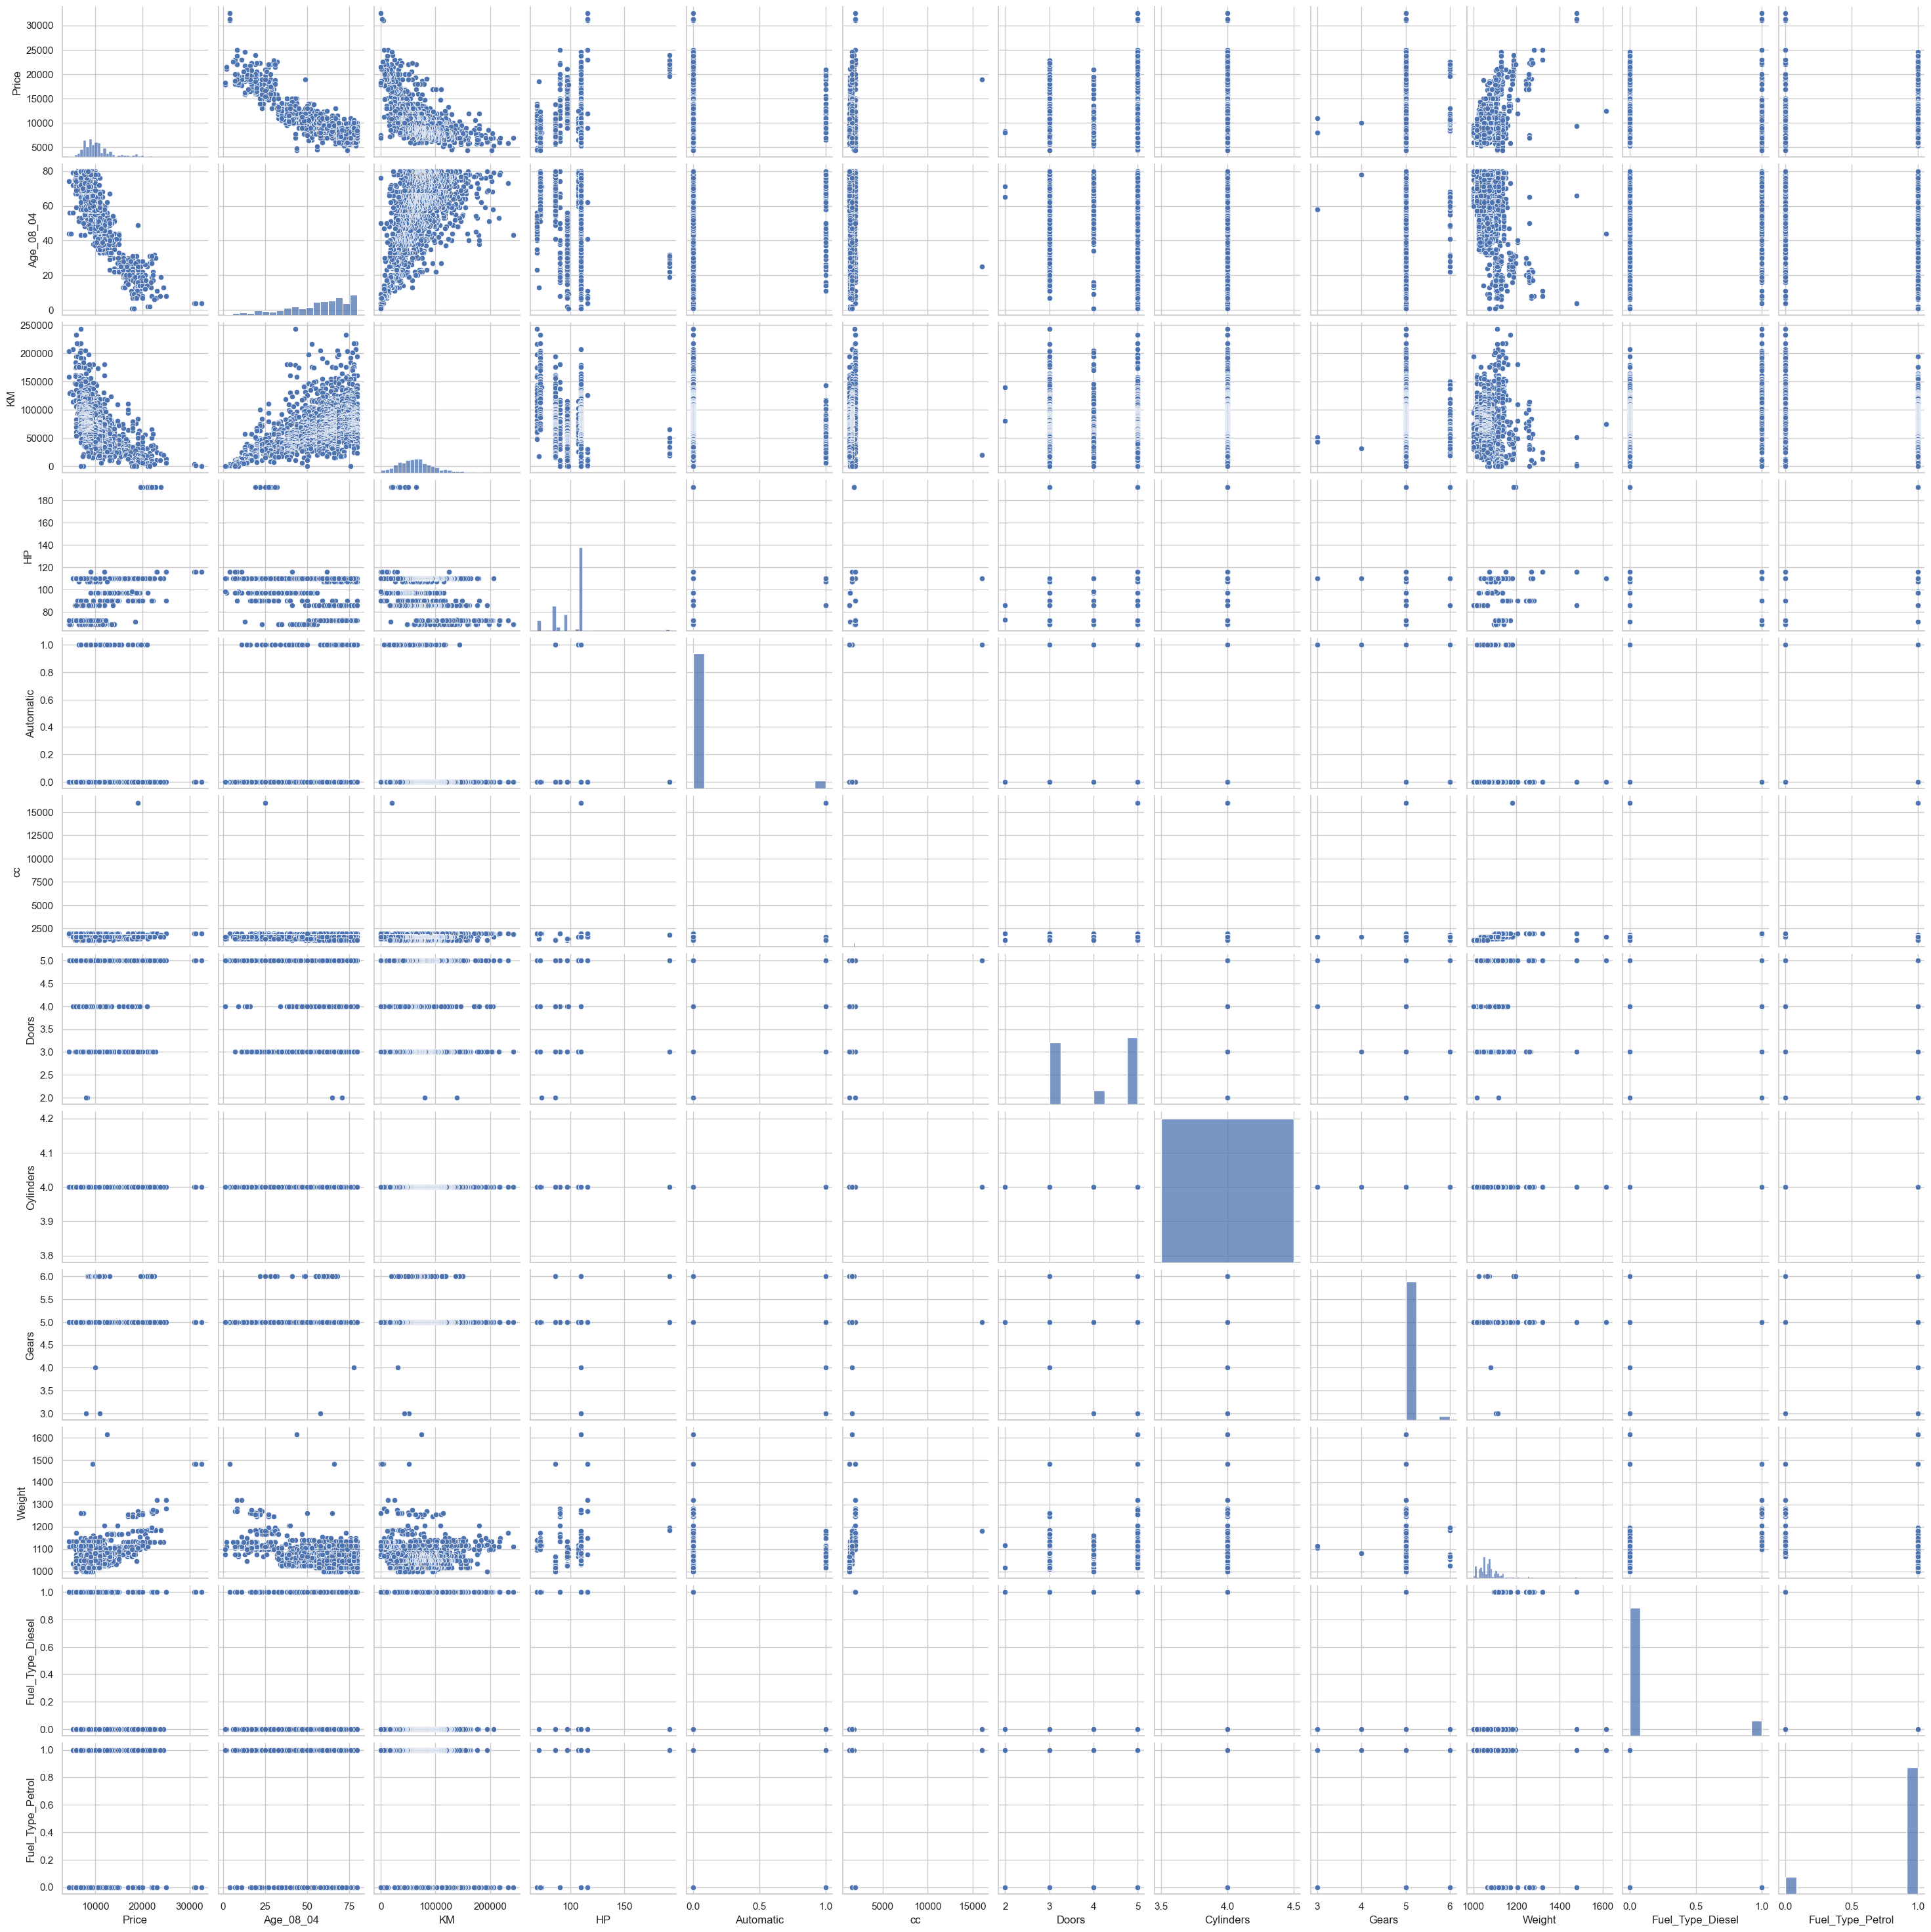

In [52]:
# Pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()

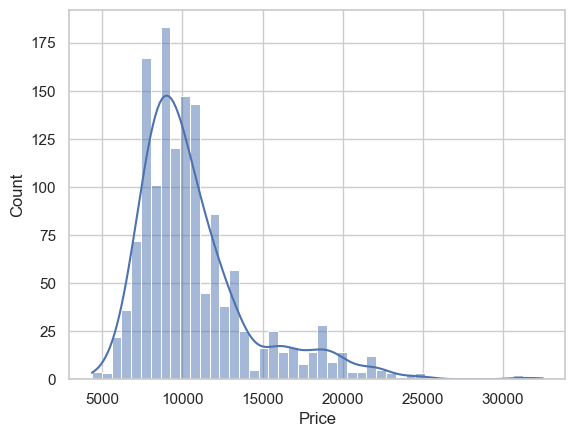

In [53]:
# Distribution of the target variable (Price)
sns.histplot(df['Price'], kde=True)
plt.show()

### 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# Define features and target variable
X = df_scaled.drop('Price', axis=1)
y = df_scaled['Price']

In [56]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

#### Model 1

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
# Basic linear regression
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

#### Model 2

In [59]:
# Linear regression with interaction terms
from sklearn.preprocessing import PolynomialFeatures

In [60]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [61]:
model2 = LinearRegression()
model2.fit(X_train_poly, y_train)

LinearRegression()

#### Model 3

In [62]:
# Linear regression with regularization (Ridge)
from sklearn.linear_model import Ridge

In [63]:
model3 = Ridge(alpha=1.0)
model3.fit(X_train, y_train)

Ridge()

In [64]:
# Interpret coefficients of the first model
coefficients = pd.DataFrame(model1.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
Age_08_04,-1.784748e+03
KM,-1.076489e+01
HP,-2.260804e+02
Automatic,-3.561585e+00
cc,-1.058104e+02
Doors,1.648459e-12
Cylinders,1.023940e+02
Gears,2.590849e+03
Weight,-4.818302e+02
Fuel_Type_Diesel,1.260723e+02


### 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset

In [66]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [67]:
# Evaluate Model 1
y_pred1 = model1.predict(X_test)
r2_model1 = r2_score(y_test, y_pred1)
mae_model1 = mean_absolute_error(y_test, y_pred1)
mse_model1 = mean_squared_error(y_test, y_pred1)

In [71]:
# Print evaluation metrics
print(f"Model 1:\nR²: {r2_model1} \nMAE: {mae_model1} \nMSE: {mse_model1}")

Model 1:
R²: 0.56597988474868 
MAE: 1553.098988679414 
MSE: 5791038.751717471


In [72]:
# Evaluate Model 2
y_pred2 = model2.predict(X_test_poly)
r2_model2 = r2_score(y_test, y_pred2)
mae_model2 = mean_absolute_error(y_test, y_pred2)
mse_model2 = mean_squared_error(y_test, y_pred2)

In [73]:
# Print evaluation metrics
print(f"Model 2:\nR²: {r2_model2} \nMAE: {mae_model2} \nMSE: {mse_model2}")

Model 2:
R²: 0.37181025912909416 
MAE: 1419.2684326171875 
MSE: 8381803.06622023


In [74]:
# Evaluate Model 3
y_pred3 = model3.predict(X_test)
r2_model3 = r2_score(y_test, y_pred3)
mae_model3 = mean_absolute_error(y_test, y_pred3)
mse_model3 = mean_squared_error(y_test, y_pred3)

In [75]:
# Print evaluation metrics
print(f"Model 3:\nR²: {r2_model3} \nMAE: {mae_model3} \nMSE: {mse_model3}")

Model 3:
R²: 0.5669316969856402 
MAE: 1553.3353324319453 
MSE: 5778338.92202086


### 5.Apply Lasso and Ridge methods on the model.

In [76]:
from sklearn.linear_model import Lasso

In [77]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [78]:
y_pred_lasso = lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

In [79]:
# Print evaluation metrics
print(f"Lasso:\nR²: {r2_lasso} \nMAE: {mae_lasso} \nMSE: {mse_lasso}")

Lasso:
R²: 0.5660784725795722 
MAE: 1553.12790548183 
MSE: 5789723.315107318


#### where Ridge is already done as model 3 

# Interview Questions:

## 1.What is Normalization & Standardization and how is it helpful?


**Normalization and standardization** are techniques used to rescale the values of features in a dataset, particularly useful in preparing data for machine learning models.


**Normalization:** This technique scales the data to a fixed range, typically [0,1]. It's done by subtracting the minimum value of a feature from each data point and then dividing by the range i.e., the difference between the maximum and minimum values. Normalization is particularly useful when you want to ensure that all features contribute equally to the model, especially in distance-based algorithms like K-Nearest Neighbors or clustering techniques.

**Standardization:** This technique transforms the data so that it has a mean of 0 and a standard deviation of 1. It's done by subtracting the mean of each feature from the data points and then dividing by the standard deviation. Standardization is particularly useful in algorithms like linear regression or support vector machines, where features with larger scales can dominate the objective function. Standardizing ensures that each feature contributes proportionately.

### How it's helpful:

Both techniques help improve the performance of machine learning models by ensuring that features are on the same scale. This prevents models from being biased toward features with larger values and speeds up the convergence of gradient-based optimization algorithms.

# 2.What techniques can be used to address multicollinearity in multiple linear regression?


**Multicollinearity** occurs when two or more predictor variables in a multiple linear regression model are highly correlated, leading to instability in the coefficient estimates and reducing the interpretability of the model.

To address multicollinearity, you can use the following techniques:

**Remove Highly Correlated Predictors:** One straightforward approach is to examine the correlation matrix of the predictors and remove one of the variables from pairs that have a high correlation (e.g., correlation coefficient above 0.8 or 0.9). This reduces redundancy and simplifies the model.

**Principal Component Analysis (PCA):** PCA is a dimensionality reduction technique that transforms the original correlated variables into a set of uncorrelated components. These components can then be used as predictors in the regression model, effectively eliminating multicollinearity.

**Ridge Regression (L2 Regularization):** Ridge regression adds a penalty to the regression objective function based on the size of the coefficients, which helps to shrink the coefficients of correlated variables. This reduces their variance and mitigates the impact of multicollinearity, although the trade-off is that some interpretability of the coefficients is lost.

**Variance Inflation Factor (VIF):** Before making any adjustments, you can calculate the VIF for each predictor. A VIF value greater than 5 (or 10, depending on the context) suggests high multicollinearity. Based on the VIF, you can decide which variables to remove or transform.

